<div style="background-color: lightblue; padding: 10px;">

# Table Of Contents

1. [Introduction](#1)
   
2. [Data Loading](#2)

3. [Data Exploration & Visualization](#3)

4. [Data Preprocessing](#4)

5. [Modeling](#5)

6. [Model Evaluation](#6)

7. [HyperParameter Tunning](#7)

8. [Conclusion](#8)


</di>


## Introduction
<a id='1'></a>

* Title: "California Housing Price Prediction"

* Brief Overview: I made this project for a go-through for basics in machine learning, i have used some custom code rather than just calling functions and doing all work, so it will increase the understanding of what actually is happening.

* Dataset Description: We will be using california housing dataset https://www.kaggle.com/datasets/camnugent/california-housing-prices . In this dataset there are 8 Numerical Features(longitude,	latitude, housing_median_age,	total_rooms, total_bedrooms, population, households,	median_income)	One Target variable (median_house_value) and One Categorical Feature (ocean_proximity).
 we will be using these 8 numerical features and one categorical feature to fine tune our model parameters so that it can predict our target variable.

## Data Loading
<a id='2'></a>

In [1]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

from urllib import request

# Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# Remove unwanted warnings
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
# Extracting Data File
from zipfile import ZipFile
dataset = 'Housing_prediction_data/archive (5).zip'
extract_to = 'Housing_prediction_data'
with ZipFile(dataset, 'r') as zip:
    zip.extractall(extract_to)
    print("File Extracted")

File Extracted


In [4]:
# Loading Data
housing = pd.read_csv("Housing_prediction_data/housing.csv")

In [5]:
# Looking into Data
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


### Data Exploration and Visualization
<a id='3'></a>

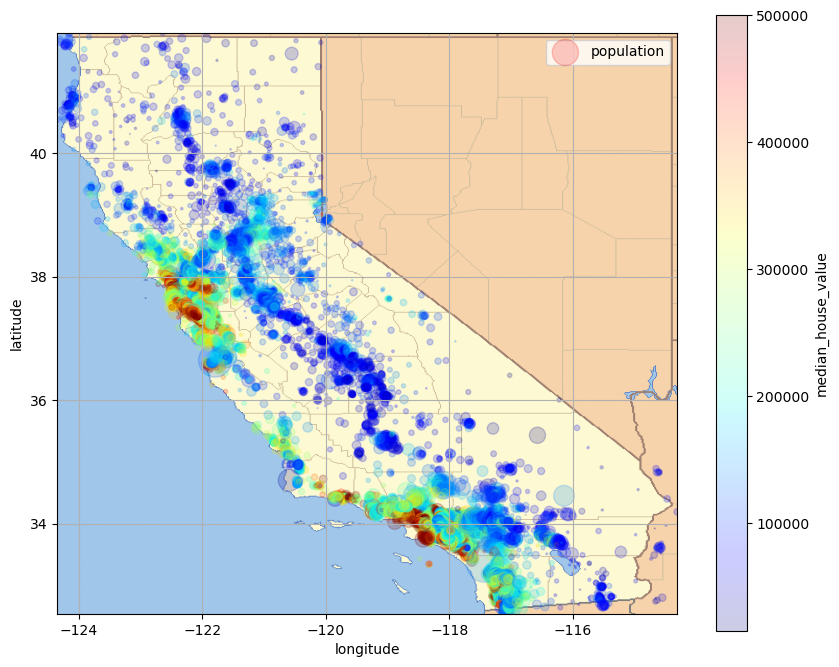

In [6]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, grid=True,c='median_house_value', 
             s=housing['population']/50, cmap='jet', figsize=(10,8), label='population')

# axis = (xmin, xmax, ymin, ymax)
axis = (housing.longitude.min(), housing.longitude.max(), 
        housing.latitude.min(), housing.latitude.max())

# Downloading california image(i have taken this image from ageron's repository)
path = "https://github.com/ageron/handson-ml/raw/master/images/end_to_end_project/california.png"
download_to = "Housing_prediction_data/california.png"
request.urlretrieve(path, download_to)

# Show image with density
img = plt.imread("Housing_prediction_data/california.png")
plt.imshow(img, extent=axis)
plt.show()

### Dealing with NAN values

In [7]:
# Check For NAN values
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Dealing with missing values

In [9]:
median = housing['total_bedrooms'].median()
median

435.0

In [10]:
standard_deviation =  housing['total_bedrooms'].std()
standard_deviation

421.3850700740322

In [11]:
housing['total_bedrooms'] = housing['total_bedrooms'].apply(
    lambda x: np.random.normal(median, standard_deviation) if np.isnan(x) else (x)
)

### checking relationship between features

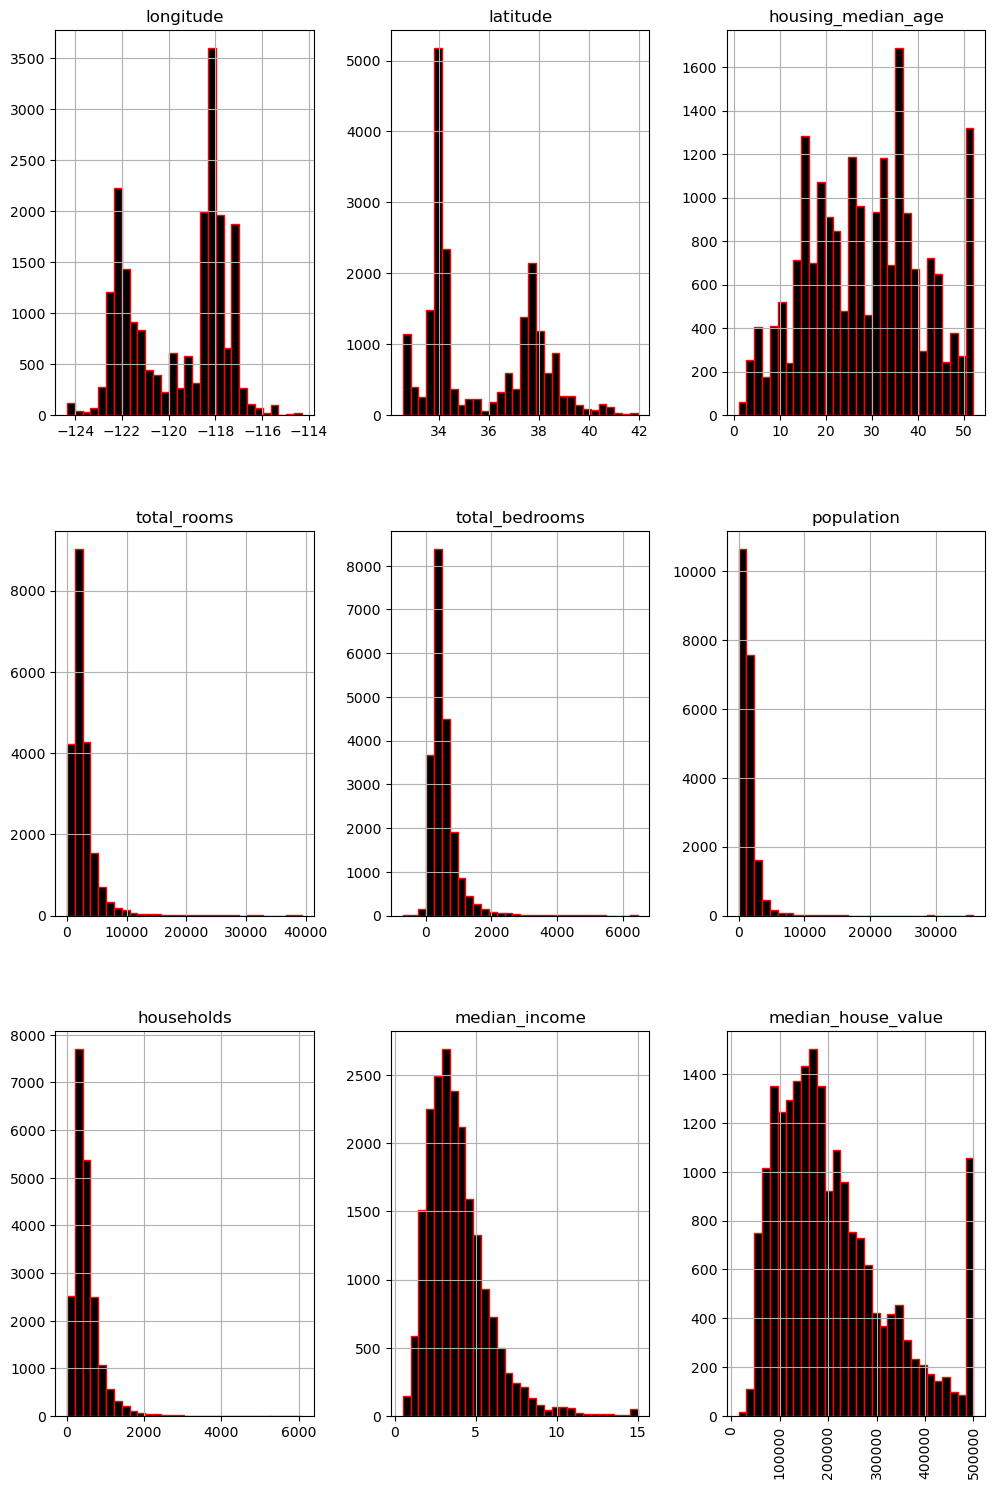

In [12]:
housing.hist(bins=30,fc='k',ec='r', figsize=(12,18))
plt.xticks(rotation=90)
plt.show()

In [13]:
housing.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068344,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065381,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317215,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.922428,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.068344,-0.065381,-0.317215,0.922428,1.000000,0.869683,0.969807,-0.007188,0.048861
population,0.099773,-0.108785,-0.296244,0.857126,0.869683,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.969807,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007188,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.048861,-0.024650,0.065843,0.688075,1.000000


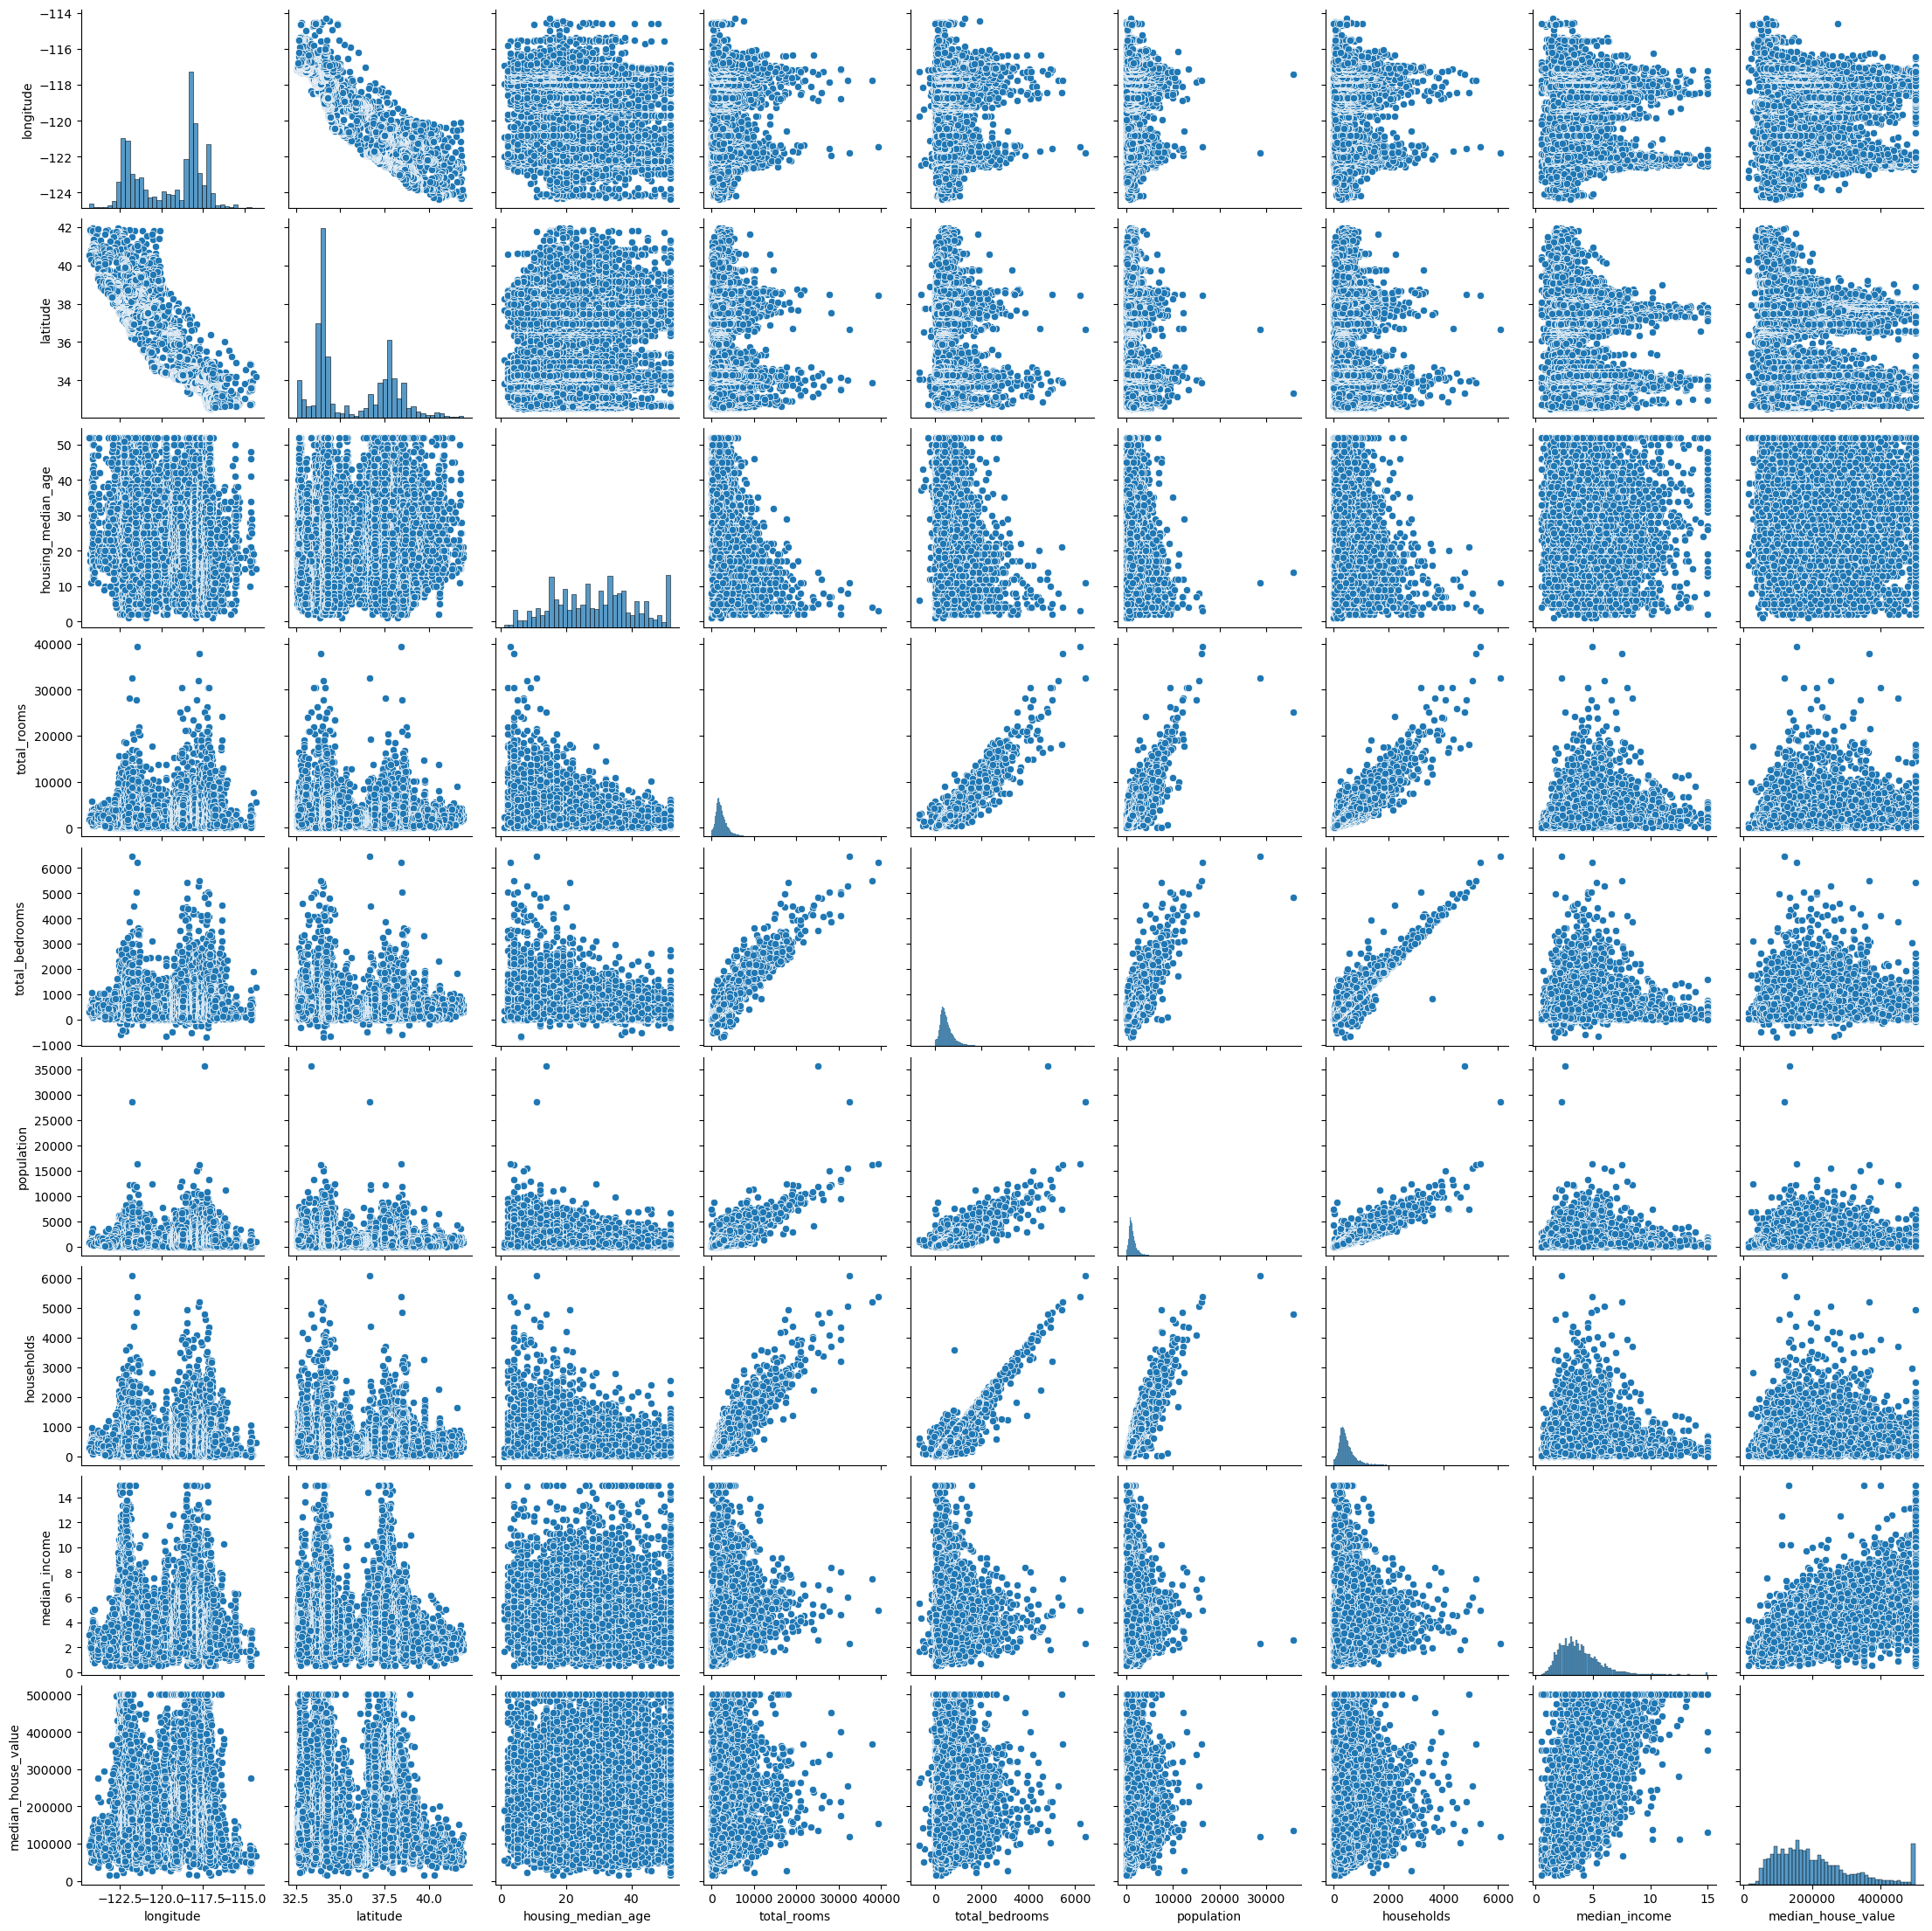

In [14]:
sns.pairplot(data=housing)
plt.show()

# Data Preprocessing
<a id='4'></a>

In [15]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


## Removing Outliers/Noise

In [16]:
Features = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms",
            "population", "households",	"median_income", "median_house_value"]

In [17]:
for i in Features:
    mean = housing[i].mean()
    std = housing[i].std()
    left_boundary = mean - (3*std)
    right_boundary = mean + (3*std)
    
    for j in range(len(housing)):
        if (housing[i].iloc[j] < left_boundary) or (housing[i].iloc[j] > right_boundary):
            housing[i].iloc[j] = np.random.normal(left_boundary, right_boundary)

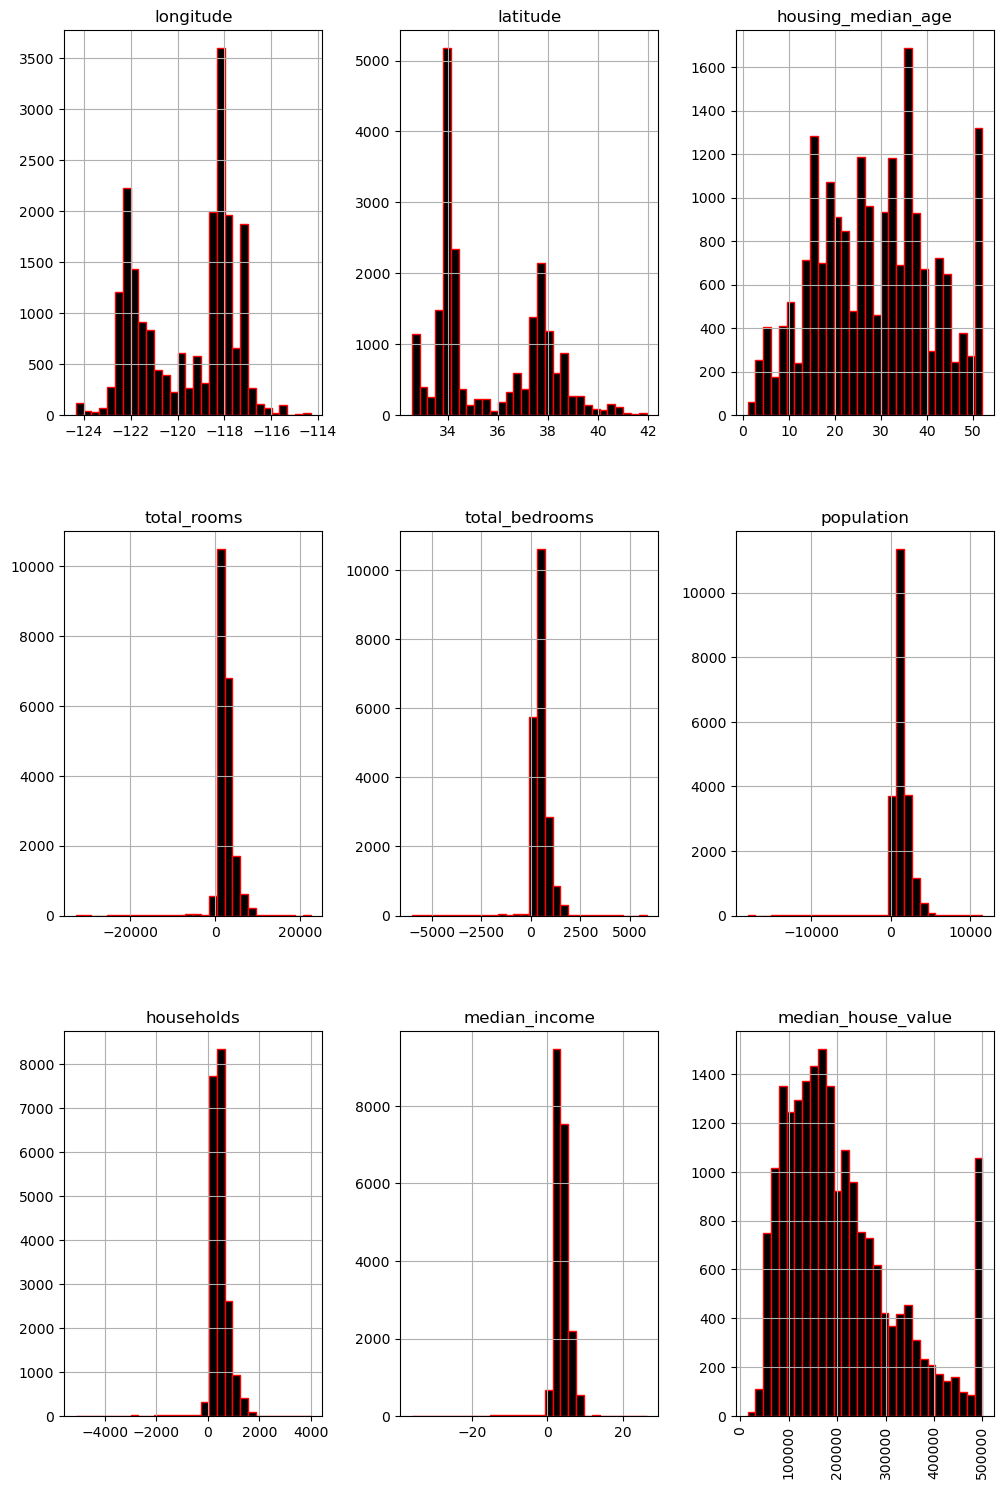

In [18]:
housing.hist(bins=30,fc='k',ec='r', figsize=(12,18))
plt.xticks(rotation=90)
plt.show()

### Categorical encoding

In [19]:
mean_value = housing.groupby('ocean_proximity')['median_house_value'].mean().to_dict()
mean_value

{'<1H OCEAN': 240084.28546409807,
 'INLAND': 124805.39200122119,
 'ISLAND': 380440.0,
 'NEAR BAY': 259212.31179039303,
 'NEAR OCEAN': 249433.97742663656}

In [20]:
housing['ocean_proximity_encoded'] = housing['ocean_proximity'].map(mean_value)
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,259212.31179
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,259212.31179


In [21]:
housing.drop(labels = 'ocean_proximity' , axis = 1, inplace=True)
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,259212.31179
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,259212.31179


## Modeling 
<a id='5'></a>

In [22]:
X = housing.drop(labels="median_house_value", axis=1)
y = housing[["median_house_value"]]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Machines Regressor": SVR(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [27]:
def model_training(model):
    model.fit(X_train,y_train)

In [28]:
for model_name, model in models.items():
    model_training(model)

## Model Evaluation
<a id='6'></a>

In [52]:
def model_evaluation(model, model_name):
    y_prediction = model.predict(X_test)
    
    sns.kdeplot(y_test, label='True Values (y_test)', color='blue')
    sns.kdeplot(y_prediction, label='Predicted Values (y_prediction)', color='red')
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.title("KDE Plot of True vs Predicted Values")
    plt.legend()
    plt.show()
    
    mse_test = mean_squared_error(y_test, y_prediction)
    rmse_test = np.sqrt(mse_test)
    r2_score_test = r2_score(y_test, y_prediction)
    print(model_name)
    print("Mean squared error: ",mse_test)
    print("Root mean squared error: ",rmse_test)
    print("R2_Score Test: ", r2_score_test)
    print("-"*100)

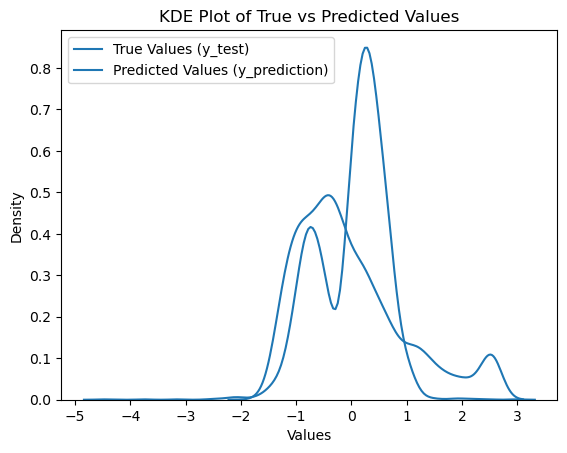

Linear Regression
Mean squared error:  0.6490615370197313
Root mean squared error:  0.8056435545697187
R2_Score Test:  0.3404669086208739
----------------------------------------------------------------------------------------------------


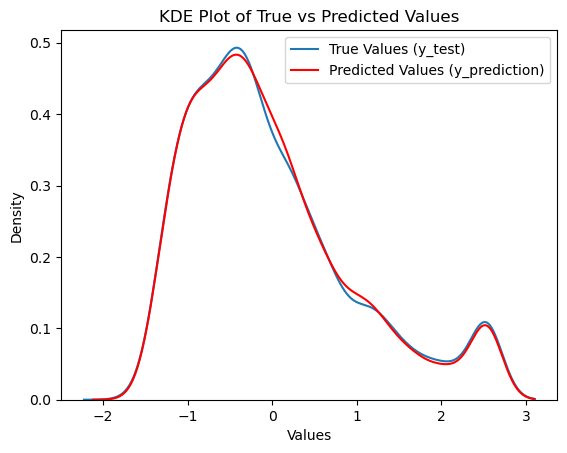

Decision Tree Regressor
Mean squared error:  0.32768454088266113
Root mean squared error:  0.572437368523982
R2_Score Test:  0.6670288009395307
----------------------------------------------------------------------------------------------------


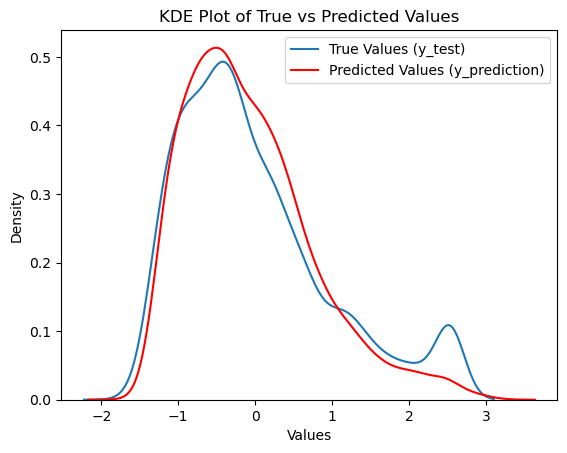

Support Vector Machines Regressor
Mean squared error:  0.29498838061240024
Root mean squared error:  0.5431283279413809
R2_Score Test:  0.7002524606841645
----------------------------------------------------------------------------------------------------


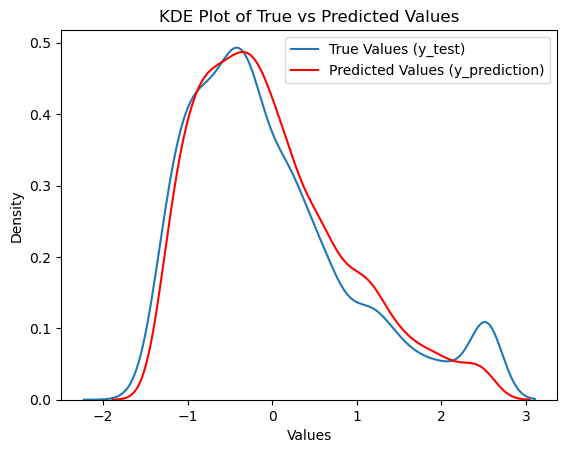

Random Forest Regressor
Mean squared error:  0.1861107266534777
Root mean squared error:  0.43140552459777065
R2_Score Test:  0.8108866788622352
----------------------------------------------------------------------------------------------------


In [54]:
for model_name, model in models.items():
    model_evaluation(model, model_name)

* Root Mean Squared Error: The closer RMSE is to 0, the better the model's predictions are.

* Mean Squared Error: The lower the MSE, the better the model performance.

* R2_Score: The closer to 1, the better the model fits the data. For example, an R² of 0.85 means that 85% of the variance in the target variable is explained by the model.

-> Based on these error values we will choose Random Forest Regressor as the best model for this data and now we will tune the hyperparameters of this model

-> Decision Tree Regressor model shows overfitting in this particular Dataset

## HyperParameter Tunning
<a id='7'></a>

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],                # Number of trees
    'max_depth': [10, 20, 30],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]                # Minimum samples required to split
}

In [55]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid,  
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           cv=3)

In [56]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [57]:
grid_search.best_params_

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}

In [58]:
y_prediction = grid_search.predict(X_test)

In [59]:
mse_test = mean_squared_error(y_test, y_prediction)
rmse_test = np.sqrt(mse_test)
r2_score_test = r2_score(y_test, y_prediction)
print("Mean squared error: ",mse_test)
print("Root mean squared error: ",rmse_test)
print("R2_Score Test: ", r2_score_test)

Mean squared error:  0.18436661733992787
Root mean squared error:  0.4293793396752199
R2_Score Test:  0.8126589265485646


If we will increase cv value then the error will minimize more and R2_score will come more closer to 1, if we compare it to previous results then this is the best one that we have got till now.

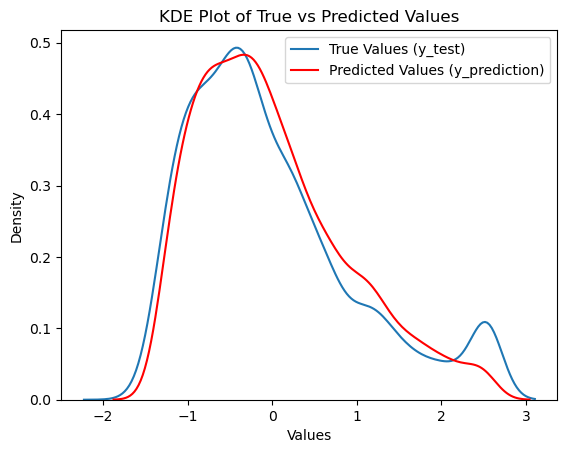

In [60]:
sns.kdeplot(y_test, label='True Values (y_test)', color='blue')
sns.kdeplot(y_prediction, label='Predicted Values (y_prediction)', color='red')
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("KDE Plot of True vs Predicted Values")
plt.legend()
plt.show()

## Conclusion
<a id='8'></a>

* The best-performing model is selected based on the evaluation metrics. Further improvements can be made by applying advanced models and more in-depth feature engineering.
* In this notebook i tried to keep the process simple so that it could be easily understandable.
* I missed on many things that could have been done but the question arises 'was that needed here?'
* Any kind of feedback is welcomed, so if anyone reading this Thankyou for doing so.